## Import Data and Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import pickle

In [32]:
with open("train.p", mode='rb') as training_data:
        train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
        valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
        test = pickle.load(testing_data)

In [33]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [34]:
X_train.shape # image #, pixel x pixel, rgb

(34799, 32, 32, 3)

In [35]:
y_train.shape

(34799,)

In [36]:
X_validation.shape

(4410, 32, 32, 3)

In [37]:
X_test.shape

(12630, 32, 32, 3)

## Image Exploration

36

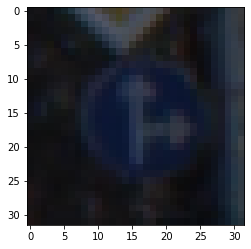

In [38]:
i = 1000
plt.imshow(X_train[i])
y_train[i] # 36 => go straight or right

34

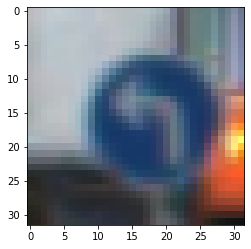

In [39]:
i = 2000
plt.imshow(X_test[i])
y_test[i] # 36 => go straight or right

## Data Normalization

In [40]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Convert images from color to grayscale

In [41]:
X_train_grey = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_grey = np.sum(X_validation/3, axis = 3, keepdims = True)

In [42]:
X_train_grey.shape

(34799, 32, 32, 1)

In [43]:
X_test_grey.shape

(12630, 32, 32, 1)

In [44]:
X_validation_grey.shape

(4410, 32, 32, 1)

In [45]:
X_train_grey_norm = (X_train_grey-128)/128
X_test_grey_norm = (X_test_grey-128)/128
X_validation_grey_norm = (X_validation_grey-128)/128

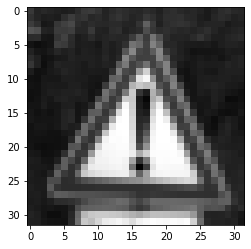

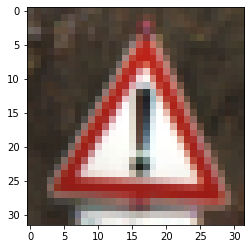

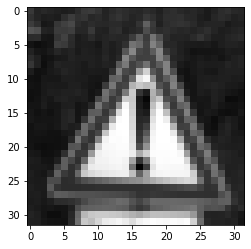

In [46]:
i = 10
plt.imshow(X_train_grey[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_grey_norm[i], cmap = 'gray')

## Model Building

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [48]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation= 'relu', input_shape = (32,32,1))) # adding our first convolution
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size=(5, 5), activation= 'relu')) 
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax')) 



In [49]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [50]:
history = cnn_model.fit(X_train_grey_norm,
             y_train,
             batch_size = 500,
             epochs = 9,
             verbose = 1,
             validation_data = (X_validation_grey_norm, y_validation))

Epoch 1/9
70/70 [==============================] - 7s 96ms/step - loss: 3.4661 - accuracy: 0.1104 - val_loss: 2.6470 - val_accuracy: 0.3098
Epoch 2/9
70/70 [==============================] - 7s 95ms/step - loss: 1.9465 - accuracy: 0.4688 - val_loss: 1.3743 - val_accuracy: 0.6190
Epoch 3/9
70/70 [==============================] - 6s 91ms/step - loss: 1.0179 - accuracy: 0.7145 - val_loss: 1.0251 - val_accuracy: 0.7027
Epoch 4/9
70/70 [==============================] - 6s 92ms/step - loss: 0.7059 - accuracy: 0.8052 - val_loss: 0.8462 - val_accuracy: 0.7517
Epoch 5/9
70/70 [==============================] - 6s 89ms/step - loss: 0.5497 - accuracy: 0.8515 - val_loss: 0.7501 - val_accuracy: 0.7966
Epoch 6/9
70/70 [==============================] - 6s 90ms/step - loss: 0.4561 - accuracy: 0.8783 - val_loss: 0.6986 - val_accuracy: 0.7993
Epoch 7/9
70/70 [==============================] - 6s 92ms/step - loss: 0.3835 - accuracy: 0.9007 - val_loss: 0.6731 - val_accuracy: 0.8168
Epoch 8/9
70/70 [===

In [51]:
score = cnn_model.evaluate(X_test_grey_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.8412 - accuracy: 0.8214
Test Accuracy: 0.821377694606781


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Vaidation Accuracy')

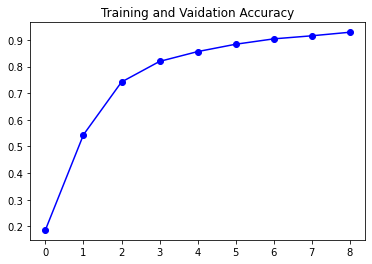

In [53]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Vaidation Accuracy')

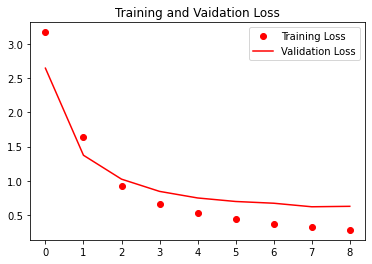

In [55]:
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Vaidation Loss')
plt.legend()

In [56]:
predicted_classes = cnn_model.predict_classes(X_test_grey_norm)
y_true = y_test

c:\users\hp\miniconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

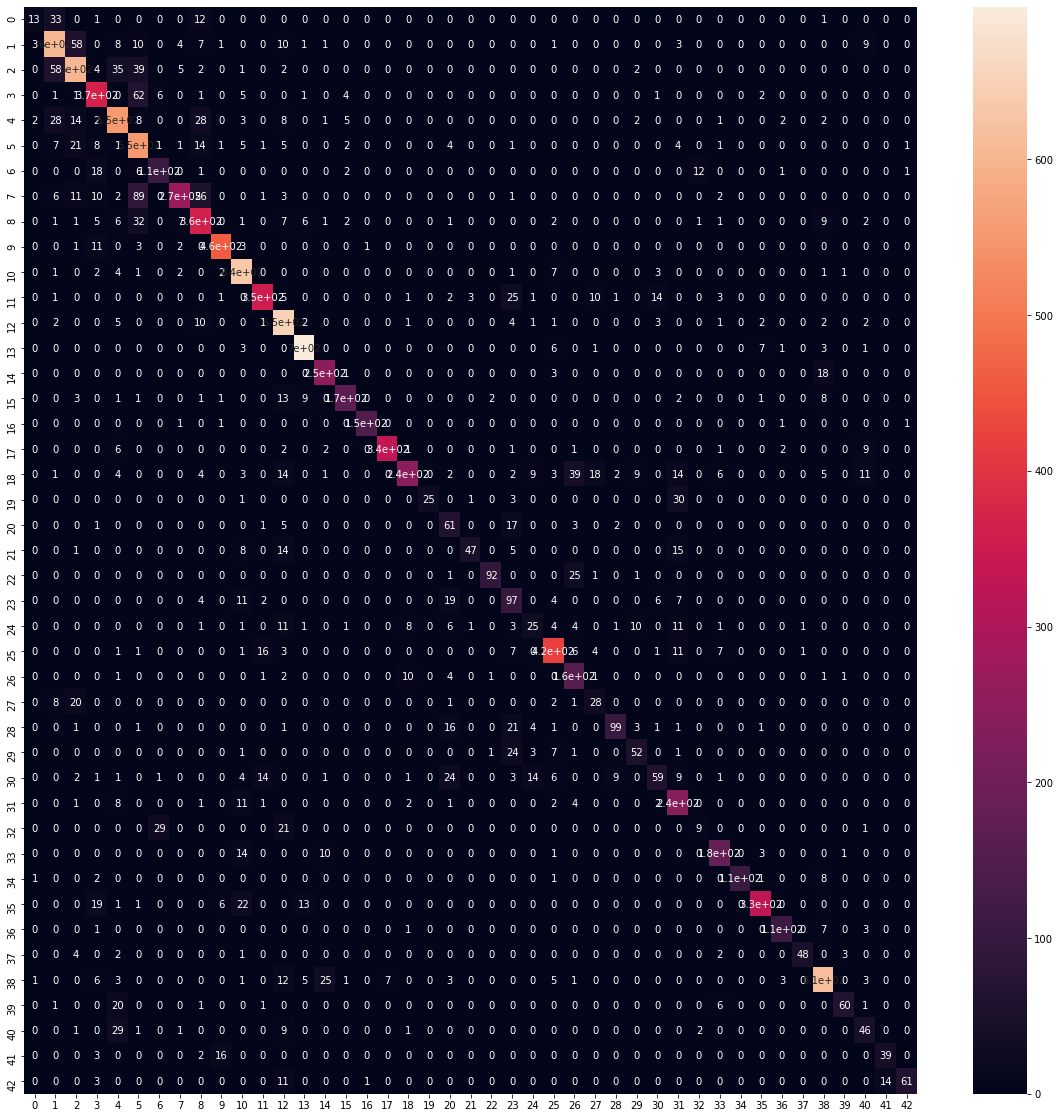

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot = True)

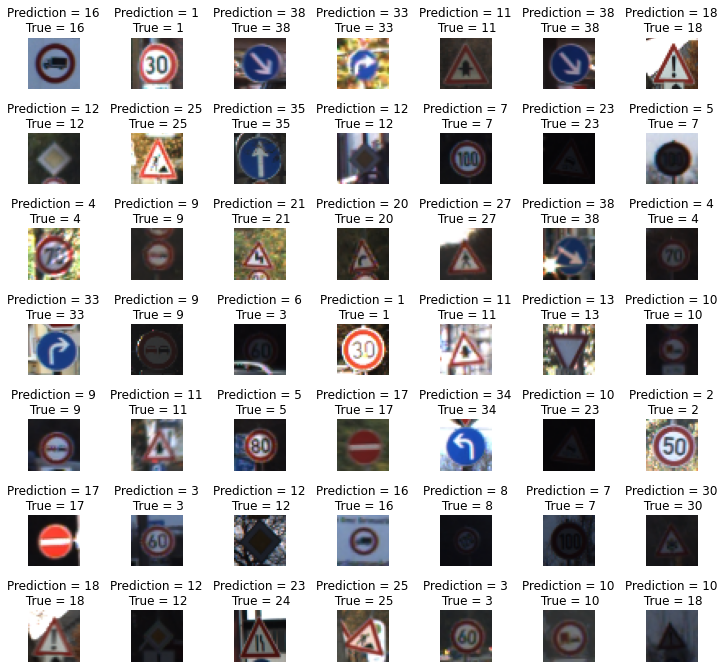

In [65]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)
